# WeatherPy
----

### Analysis
There appears to be a strong non-linear relationship between temperature and latitutde, temperatures increase as a city's location approaches the equator, 
with temperatures dropping more rapidly north of the equator vs south of the equator.  

There appears to be no relationship between latitude and humidity, most cities remaining below 100% humidity with the exception of one outlier: Talera, Peru. Talera recorded
290% humidity which is a condition known as supersaturation. 

There appears to be no relationship between cloudiness and latitude with a cluster of cities at 0% cloudiness .

There appears to be no relationship between wind speed and latitude with the majority of cities remaining under 10 MPH in wind speed. 




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold response info
cities_found= []
max_temp = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
wind_speed = []


# Loop through the list of cities and perform a request for data on each item, append to lists   
print("Beginning Data Retrieval")
print("-------------------------")
for index, city in enumerate(cities): 
    weather_json = requests.get(query_url + city).json()
    print(f"Processsing Record {index} of {len(cities)}: {city}")
#skip results for data not found (keyerror)    
#include print log with city name & index number  
    try:
        max_temp.append(weather_json["main"]["temp_max"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        wind_speed.append(weather_json["wind"]["speed"])
        cities_found.append(weather_json["name"])
    except (KeyError, IndexError):
        pass
        print("City not found. Skipping...")
    
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")
    
 
    


Beginning Data Retrieval
-------------------------
Processsing Record 0 of 628: turayf
Processsing Record 1 of 628: ushuaia
Processsing Record 2 of 628: zlobin
Processsing Record 3 of 628: bredasdorp
Processsing Record 4 of 628: jamestown
Processsing Record 5 of 628: sioux lookout
Processsing Record 6 of 628: yellowknife
Processsing Record 7 of 628: ipixuna
Processsing Record 8 of 628: portland
Processsing Record 9 of 628: barentsburg
City not found. Skipping...
Processsing Record 10 of 628: hithadhoo
Processsing Record 11 of 628: shelburne
Processsing Record 12 of 628: tasiilaq
Processsing Record 13 of 628: northam
Processsing Record 14 of 628: rikitea
Processsing Record 15 of 628: norman wells
Processsing Record 16 of 628: yuzhno-kurilsk
Processsing Record 17 of 628: ambatondrazaka
Processsing Record 18 of 628: busselton
Processsing Record 19 of 628: cape town
Processsing Record 20 of 628: arraial do cabo
Processsing Record 21 of 628: lebu
Processsing Record 22 of 628: barrow
Process

Processsing Record 193 of 628: leh
Processsing Record 194 of 628: illoqqortoormiut
City not found. Skipping...
Processsing Record 195 of 628: garca
Processsing Record 196 of 628: khatanga
Processsing Record 197 of 628: touros
Processsing Record 198 of 628: baltiysk
Processsing Record 199 of 628: namibe
Processsing Record 200 of 628: elmvale
Processsing Record 201 of 628: coahuayana
Processsing Record 202 of 628: bontang
Processsing Record 203 of 628: banda aceh
Processsing Record 204 of 628: kaitangata
Processsing Record 205 of 628: eston
Processsing Record 206 of 628: port elizabeth
Processsing Record 207 of 628: udachnyy
Processsing Record 208 of 628: zhezkazgan
Processsing Record 209 of 628: takab
Processsing Record 210 of 628: abapo
Processsing Record 211 of 628: ghosi
Processsing Record 212 of 628: kamenka
City not found. Skipping...
Processsing Record 213 of 628: puerto ayora
Processsing Record 214 of 628: awbari
Processsing Record 215 of 628: yerbogachen
Processsing Record 216 o

Processsing Record 382 of 628: moshi
Processsing Record 383 of 628: koumac
Processsing Record 384 of 628: havelock
Processsing Record 385 of 628: hanzhong
Processsing Record 386 of 628: champasak
Processsing Record 387 of 628: karamea
City not found. Skipping...
Processsing Record 388 of 628: rassvet
Processsing Record 389 of 628: maumere
Processsing Record 390 of 628: chatrapur
Processsing Record 391 of 628: lagoa
Processsing Record 392 of 628: saleaula
City not found. Skipping...
Processsing Record 393 of 628: grabouw
Processsing Record 394 of 628: bam
Processsing Record 395 of 628: luau
Processsing Record 396 of 628: sao desiderio
Processsing Record 397 of 628: itarema
Processsing Record 398 of 628: ocean city
Processsing Record 399 of 628: velingara
Processsing Record 400 of 628: dilla
Processsing Record 401 of 628: grand-santi
Processsing Record 402 of 628: tiksi
Processsing Record 403 of 628: hirara
Processsing Record 404 of 628: fairbanks
Processsing Record 405 of 628: sao filip

Processsing Record 538 of 628: lianzhou
City not found. Skipping...
Processsing Record 539 of 628: kyra
City not found. Skipping...
Processsing Record 540 of 628: valentin gomez farias
City not found. Skipping...
Processsing Record 541 of 628: tura
City not found. Skipping...
Processsing Record 542 of 628: biedenkopf
City not found. Skipping...
Processsing Record 543 of 628: mbuji-mayi
City not found. Skipping...
Processsing Record 544 of 628: san matias
City not found. Skipping...
Processsing Record 545 of 628: sakakah
City not found. Skipping...
Processsing Record 546 of 628: nicolas bravo
City not found. Skipping...
Processsing Record 547 of 628: sobolevo
City not found. Skipping...
Processsing Record 548 of 628: cupira
City not found. Skipping...
Processsing Record 549 of 628: saurimo
City not found. Skipping...
Processsing Record 550 of 628: te anau
City not found. Skipping...
Processsing Record 551 of 628: beyneu
City not found. Skipping...
Processsing Record 552 of 628: isangel


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#write results to a dictionary
weather_results = {"Cities": cities_found,
           "Max Temp": max_temp,
            "Cloudiness" : cloudiness,
            "Country" : country,
            "Date": date, 
            "Humidity": humidity,
            "Lat": lat, 
            "Lng": lng,                
            "Wind Speed" : wind_speed}
# convert results to pandas dataframe
weather_df = pd.DataFrame(weather_results)

#write dataframe to csv file
weather_df.to_csv("weather_data.csv", encoding= "utf-8", index=False)

#display dataframe
weather_df.head()



,Cities,Max Temp,Cloudiness,Country,Date,Humidity,Lat,Lng,Wind Speed
0,Turayf,51.80,40,SA,1551812400,62,31.68,38.65,13.87
1,Ushuaia,50.00,75,AR,1551814260,75,-54.81,-68.31,29.97
2,Zlobin,50.00,0,HR,1551816639,76,45.29,14.65,6.93
3,Bredasdorp,69.80,0,ZA,1551816947,77,-34.53,20.04,6.93
4,Jamestown,50.29,0,AU,1551816707,89,-33.21,138.60,10.98


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

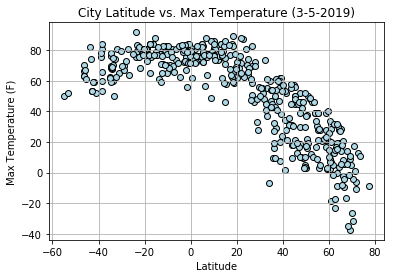

In [9]:
#create scatter plot to show relationship between latitude and temperature
import datetime
now = datetime.datetime.now()

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Max Temperature ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# save to png file and show plot
plt.savefig("latvstempplot1.png")
plt.show()

#### Latitude vs. Humidity Plot

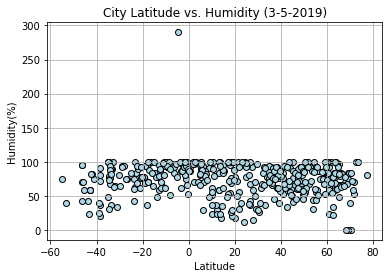

In [14]:
#create scatter plot to show relationship between latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Humidity ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# save to png file and show plot
plt.savefig("latvshumidityplot2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

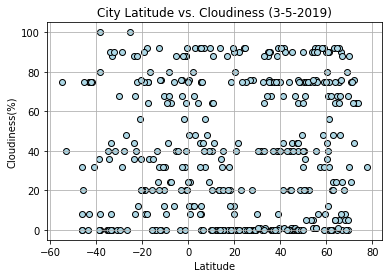

In [16]:
#create scatter plot to show relationship between latitude and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Cloudiness ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# save to png file and show plot
plt.savefig("latvscloudinessplot3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

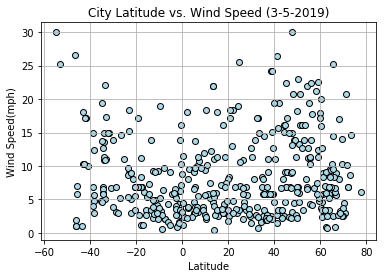

In [15]:
#create scatter plot to show relationship between latitude and wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Wind Speed ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# save to png file and show plot
plt.savefig("latvswindplot4.png")
plt.show()